In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

%matplotlib inline

input_path = Path('/kaggle/input/amex-default-prediction/')

In [2]:
#read csv with pandas. The data is used only 1 million rows with customer_ID become index
train_data = pd.read_csv(input_path / 'train_data.csv',index_col='customer_ID',nrows=1_000_000)
train_labels = pd.read_csv(input_path / 'train_labels.csv', index_col='customer_ID', nrows=1_000_000)

#shape of data
print(f'train_data has {train_data.shape}')
print(f'train_labels has {train_labels.shape}')

train_data has (1000000, 189)
train_labels has (458913, 1)


In [3]:
train_labels.index.nunique()

458913

In [4]:
# get only the labels of the customers of the first 1M rows of the train data
train_labels = train_labels[train_labels.index.isin(train_data.index)]
train_labels.shape

(82975, 1)

all customer id is in train data. 

In [5]:
train_data.head()

S_2       P_2  \
customer_ID                                                                
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...  2017-03-09  0.938469   
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...  2017-04-07  0.936665   
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...  2017-05-28  0.954180   
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...  2017-06-13  0.960384   
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...  2017-07-16  0.947248   

                                                        D_39       B_1  \
customer_ID                                                              
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...  0.001733  0.008724   
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...  0.005775  0.004923   
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...  0.091505  0.021655   
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...  0.002455  0.013683   
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...  0.002483  0.015193   

                                                         B_2       R_1  \
customer_ID                                                              
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...  1.006838  0.009228   
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...  1.000653  0.006151   
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...  1.009672  0.006815   
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...  1.002700  0.001373   
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...  1.000727  0.007605   

                                                         S_3      D_41  \
customer_ID                                                              
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...  0.124035  0.008771   
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...  0.126750  0.000798   
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...  0.123977  0.007598   
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...  0.117169  0.000685   
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...  0.117325  0.004653   

                                                         B_3  D_42  ...  \
customer_ID                                                         ...   
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...  0.004709   NaN  ...   
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...  0.002714   NaN  ...   
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...  0.009423   NaN  ...   
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...  0.005531   NaN  ...   
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...  0.009312   NaN  ...   

                                                    D_136  D_137  D_138  \
customer_ID                                                               
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...    NaN    NaN    NaN   
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...    NaN    NaN    NaN   
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...    NaN    NaN    NaN   
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...    NaN    NaN    NaN   
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...    NaN    NaN    NaN   

                                                       D_139     D_140  \
customer_ID                                                              
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...  0.002427  0.003706   
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...  0.003954  0.003167   
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...  0.003269  0.007329   
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...  0.006117  0.004516   
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...  0.003671  0.004946   

                                                       D_141  D_142     D_143  \
customer_ID                                                                     
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...  0.003818    NaN  0.000569   
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...  0.005032    NaN  0.009576   
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...  0.000427    NaN  0.003

from table, we know that `s_2` is time. We need check this column to know how long the data take

In [6]:
#check time
print(train_data['S_2'].min())
print(train_data['S_2'].max())

2017-03-01
2018-03-31


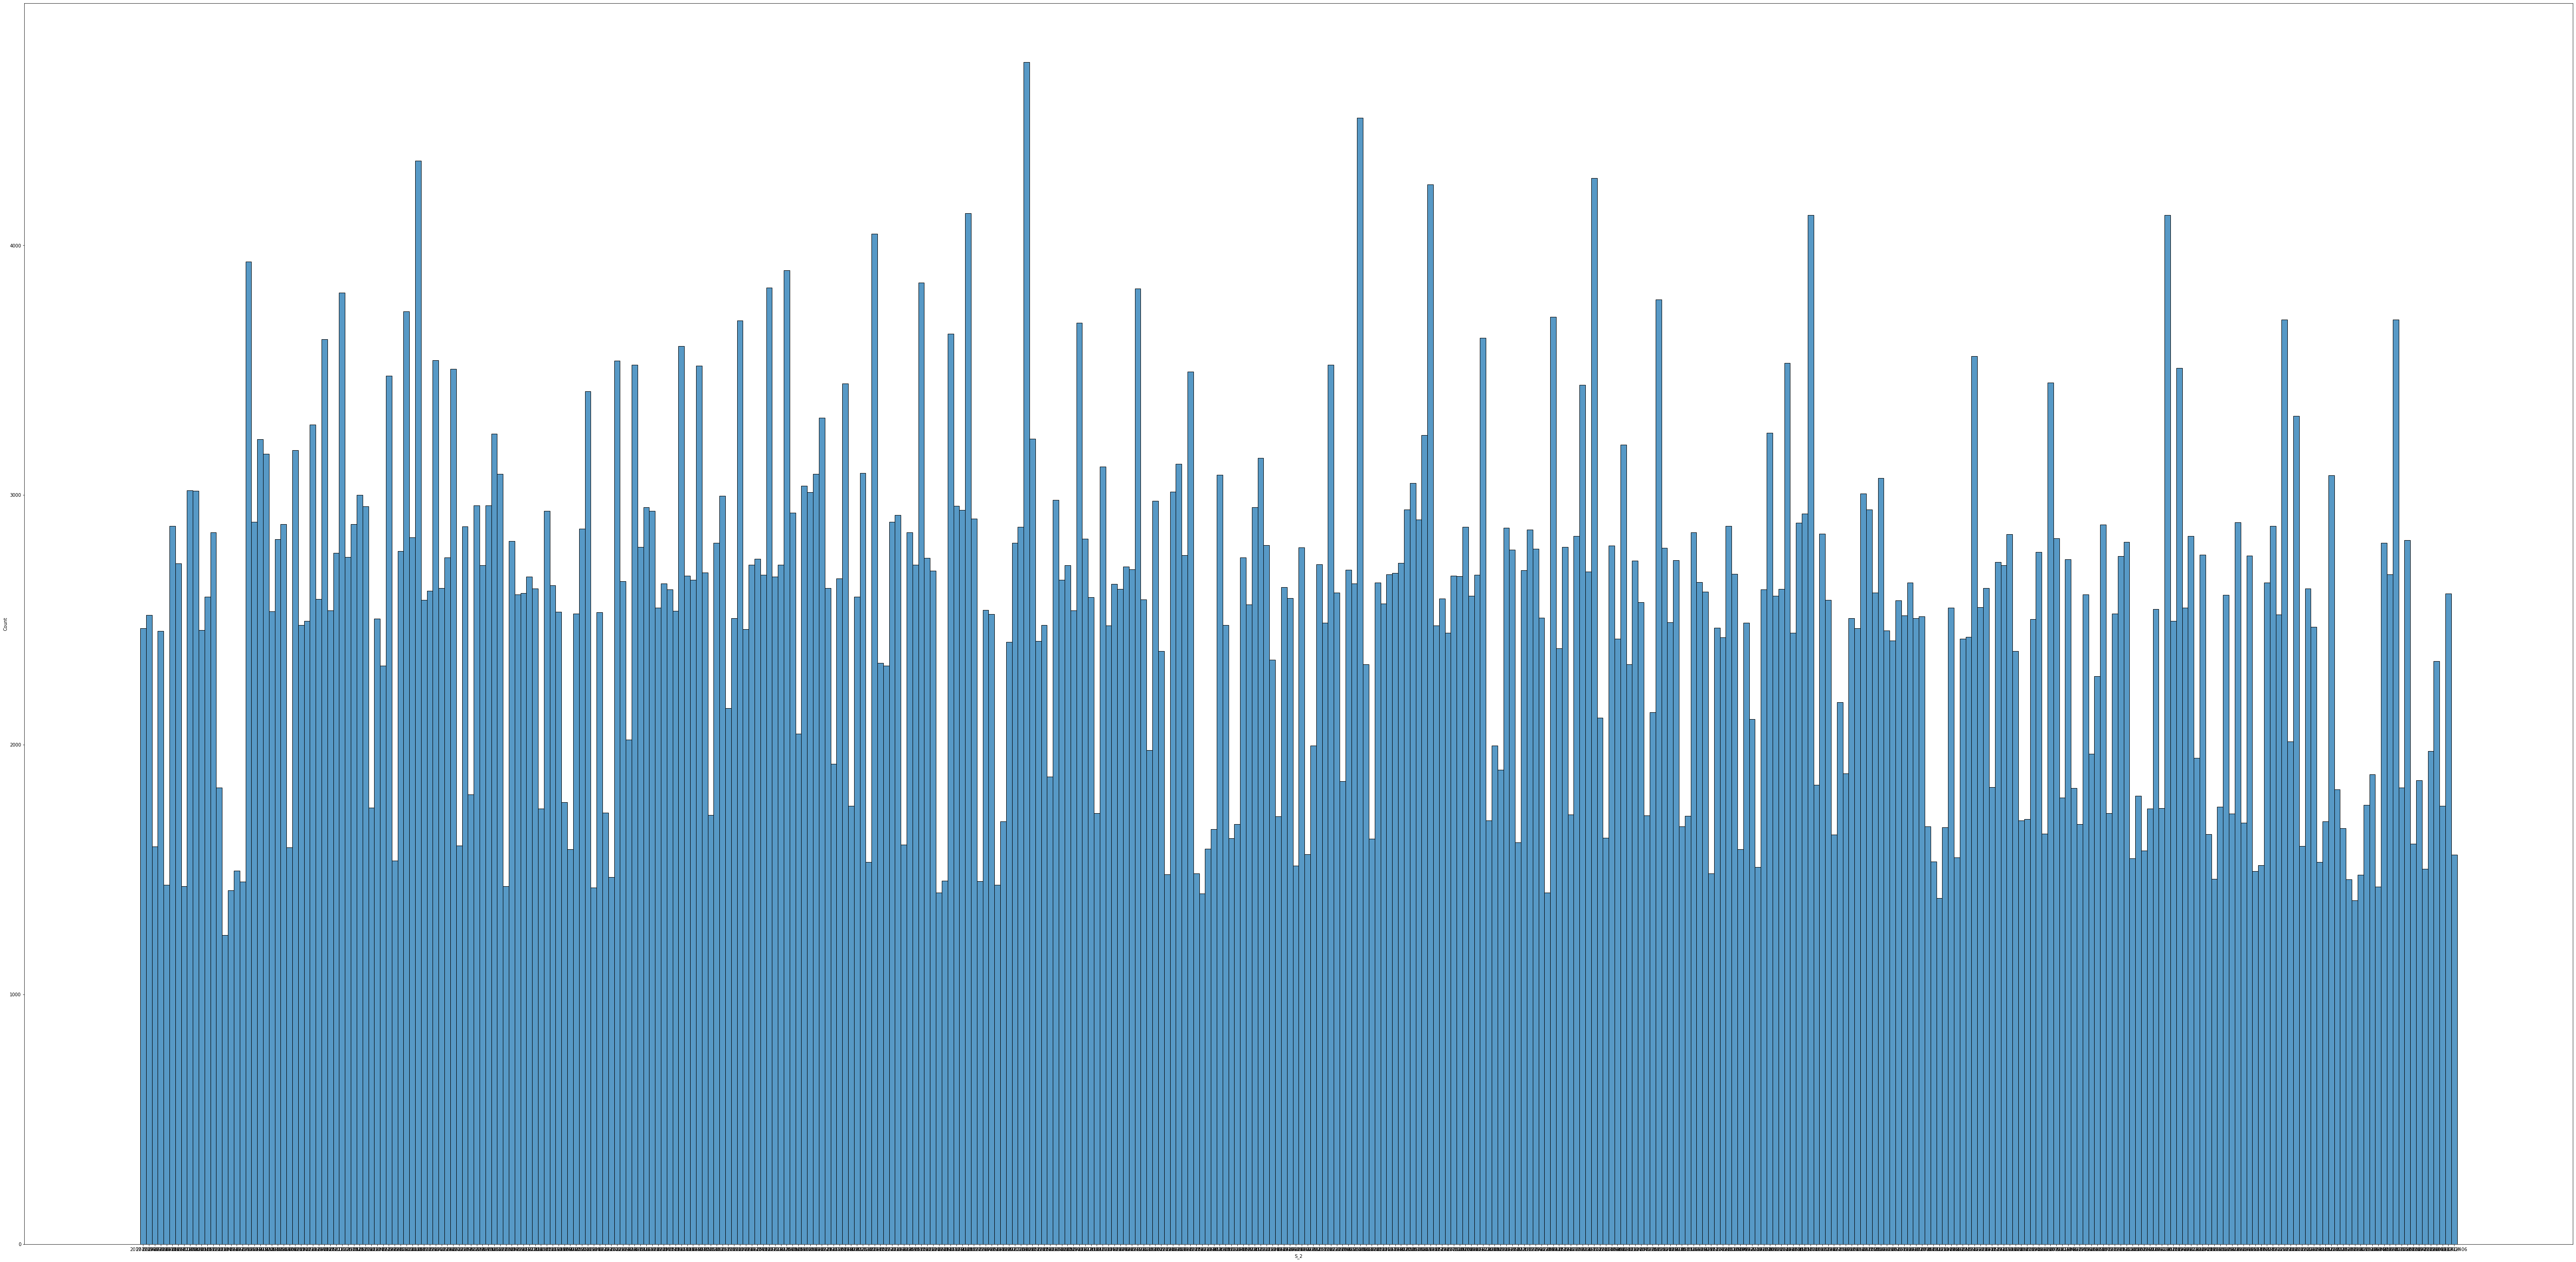

In [7]:
#distribution of time of transaction
plt.figure(figsize=(100,50))
sns.histplot(train_data['S_2'])
plt.show()

the data is 1 year user used. for classification, we don't need time feature, so we can drop this column

In [8]:
#delet s_2 column
train_data.drop(['S_2'], axis=1, inplace=True)

In [9]:
# We are going to use only the last month for sample train
last_month_train_data = train_data.groupby('customer_ID').tail(1)
last_month_train_data.drop('2e3fc76a68eeae6697b0a6b10f9288b7acaa678bbf99cd766e15723b807c3969', axis=0, inplace=True)#delete row that in 2017
last_month_train_data

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


P_2      D_39  \
customer_ID                                                              
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...  0.934745  0.009119   
00000fd6641609c6ece5454664794f0340ad84dddce9a26...  0.880519  0.178126   
00001b22f846c82c51f6e3958ccd81970162bae8b007e80...  0.880875  0.009704   
000041bdba6ecadd89a52d11886e8eaaec9325906c97233...  0.621776  0.001083   
00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8ad...  0.871900  0.005573   
...                                                      ...       ...   
2e3ee65e1147cf141a39f2b1b3f0db794379f5ec2414ca7...  1.000426  0.004806   
2e3ef5ec722d4e4476ac939414b86d375ccf3fd41b134b1...  0.616867  0.004953   
2e3f4ab9812009827df922b5a191696d92810b08bc45635...  0.215397  0.003841   
2e3f4baedc6893e68baca6b8bfd66655ba2ab2267dfb07e...  0.229802  0.090696   
2e3fabd8551cfbb7819ffc99cf22d4335953e4d911b7ea5...  0.449821  0.155417   

                                                         B_1       B_2  \
customer_ID                                                              
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...  0.009382  1.007647   
00000fd6641609c6ece5454664794f0340ad84dddce9a26...  0.034684  1.004028   
00001b22f846c82c51f6e3958ccd81970162bae8b007e80...  0.004284  0.812650   
000041bdba6ecadd89a52d11886e8eaaec9325906c97233...  0.012564  1.006183   
00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8ad...  0.007679  0.815746   
...                                                      ...       ...   
2e3ee65e1147cf141a39f2b1b3f0db794379f5ec2414ca7...  0.008649  0.819992   
2e3ef5ec722d4e4476ac939414b86d375ccf3fd41b134b1...  0.872764  0.001780   
2e3f4ab9812009827df922b5a191696d92810b08bc45635...  0.560541  0.045627   
2e3f4baedc6893e68baca6b8bfd66655ba2ab2267dfb07e...  0.246347  0.027859   
2e3fabd8551cfbb7819ffc99cf22d4335953e4d911b7ea5...  0.501278  0.025809   

                                                         R_1       S_3  \
customer_ID                                                              
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...  0.006104  0.135021   
00000fd6641609c6ece5454664794f0340ad84dddce9a26...  0.006911  0.165509   
00001b22f846c82c51f6e3958ccd81970162bae8b007e80...  0.006450       NaN   
000041bdba6ecadd89a52d11886e8eaaec9325906c97233...  0.007829  0.287766   
00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8ad...  0.001247       NaN   
...                                                      ...       ...   
2e3ee65e1147cf141a39f2b1b3f0db794379f5ec2414ca7...  0.002213       NaN   
2e3ef5ec722d4e4476ac939414b86d375ccf3fd41b134b1...  0.004576  0.408425   
2e3f4ab9812009827df922b5a191696d92810b08bc45635...  0.007181  0.598249   
2e3f4baedc6893e68baca6b8bfd66655ba2ab2267dfb07e...  0.509455  1.133173   
2e3fabd8551cfbb7819ffc99cf22d4335953e4d911b7ea5...  0.006869  0.367082   

                                                        D_41       B_3  D_42  \
customer_ID                                                                    
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...  0.001604  0.007174   NaN   
00000fd6641609c6ece5454664794f0340ad84dddce9a26...  0.005552  0.005068   NaN   
00001b22f846c82c51f6e3958ccd81970162bae8b007e80...  0.003796  0.007196   NaN   
000041bdba6ecadd89a52d11886e8eaaec9325906c97233...  0.004532  0.009937   NaN   
00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8ad...  0.000231  0.005528   NaN   
...                                                      ...       ...   ...   
2e3ee65e1147cf141a39f2b1b3f0db794379f5ec2414ca7...  0.005286  0.005221   NaN   
2e3ef5ec722d4e4476ac939414b86d375ccf3fd41b134b1...  0.736696  0.916415   NaN   
2e3f4ab9812009827df922b5a191696d92810b08bc45635...  0.320889  0.945814   NaN   
2e3f4baedc6893e68baca6b8bfd66655ba2ab2267dfb07e...  0.007566  0.316017   NaN   
2e3fabd8551cfbb7819ffc99cf22d4335953e4d911b7ea5...  0.001196  0.926053   NaN   

                                                        D_43  ...  D_136  \
customer_ID                                        

In [10]:
#merging train labels and train data
final_data = last_month_train_data.merge(train_labels, on='customer_ID', how='inner', validate='one_to_one')
final_data.shape

(82974, 189)

In [11]:
#see the correlation each feature to the target
_best_feature=final_data.corr()['target'].abs().sort_values(ascending=False)[:20]
_best_feature

target    1.000000
P_2       0.666994
D_48      0.608537
B_2       0.557123
D_61      0.548491
B_18      0.546650
D_55      0.539493
B_9       0.538280
D_44      0.529115
B_33      0.522319
B_3       0.507601
D_75      0.499618
D_58      0.498464
B_7       0.494870
B_23      0.488384
B_16      0.470115
R_1       0.469355
B_4       0.460923
D_74      0.459847
B_20      0.459451
Name: target, dtype: float64

we select only 20 the high correlation to the target and next move, we only these 20 features

In [12]:
#the most correlation features
used_columns=[col for col in final_data.columns if col in _best_feature]
final_data_selected=final_data[used_columns]
final_data_selected.isna().sum()/final_data_selected.shape[0]*100 #percetage of missing value each column

P_2        0.648396
B_2        0.007231
R_1        0.000000
B_3        0.007231
D_44       4.901535
B_4        0.000000
D_48      12.575024
B_7        0.000000
B_9        0.000000
D_55       6.706920
D_58       0.000000
D_61      10.490033
B_16       0.007231
B_18       0.000000
B_20       0.007231
B_23       0.000000
D_74       0.331429
D_75       0.000000
B_33       0.007231
target     0.000000
dtype: float64

the highest missingvalue is in D_48 c column with 12,6%. it is too low, so we can impute this column later.

In [13]:
final_data_selected.head()

P_2       B_2  \
customer_ID                                                              
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...  0.934745  1.007647   
00000fd6641609c6ece5454664794f0340ad84dddce9a26...  0.880519  1.004028   
00001b22f846c82c51f6e3958ccd81970162bae8b007e80...  0.880875  0.812650   
000041bdba6ecadd89a52d11886e8eaaec9325906c97233...  0.621776  1.006183   
00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8ad...  0.871900  0.815746   

                                                         R_1       B_3  \
customer_ID                                                              
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...  0.006104  0.007174   
00000fd6641609c6ece5454664794f0340ad84dddce9a26...  0.006911  0.005068   
00001b22f846c82c51f6e3958ccd81970162bae8b007e80...  0.006450  0.007196   
000041bdba6ecadd89a52d11886e8eaaec9325906c97233...  0.007829  0.009937   
00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8ad...  0.001247  0.005528   

                                                        D_44       B_4  \
customer_ID                                                              
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...  0.003258  0.070793   
00000fd6641609c6ece5454664794f0340ad84dddce9a26...  0.008781  0.020626   
00001b22f846c82c51f6e3958ccd81970162bae8b007e80...  0.000628  0.031044   
000041bdba6ecadd89a52d11886e8eaaec9325906c97233...  0.007792  0.007235   
00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8ad...  0.002436  0.269407   

                                                        D_48       B_7  \
customer_ID                                                              
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...  0.192376  0.058425   
00000fd6641609c6ece5454664794f0340ad84dddce9a26...  0.014696  0.028411   
00001b22f846c82c51f6e3958ccd81970162bae8b007e80...  0.080370  0.026981   
000041bdba6ecadd89a52d11886e8eaaec9325906c97233...       NaN  0.011969   
00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8ad...  0.325121  0.159818   

                                                         B_9      D_55  \
customer_ID                                                              
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...  0.009535  0.187285   
00000fd6641609c6ece5454664794f0340ad84dddce9a26...  0.012926  0.036112   
00001b22f846c82c51f6e3958ccd81970162bae8b007e80...  0.009392  0.098963   
000041bdba6ecadd89a52d11886e8eaaec9325906c97233...  0.020526  0.021400   
00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8ad...  0.004027  0.254067   

                                                        D_58      D_61  \
customer_ID                                                              
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...  0.007174  0.227637   
00000fd6641609c6ece5454664794f0340ad84dddce9a26...  0.009756  0.048978   
00001b22f846c82c51f6e3958ccd81970162bae8b007e80...  0.002847  0.137834   
000041bdba6ecadd89a52d11886e8eaaec9325906c97233...  0.009294  0.026844   
00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8ad...  0.382744  0.600739   

                                                        B_16      B_18  \
customer_ID                                                              
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...  0.006408  1.007897   
00000fd6641609c6ece5454664794f0340ad84dddce9a26...  0.002940  1.003602   
00001b22f846c82c51f6e3958ccd81970162bae8b007e80...  0.007836  1.004080   
000041bdba6ecadd89a52d11886e8eaaec9325906c97233...  0.089177  1.007289   
00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8ad...  0.005095  0.531486   

                                                        B_20      B_23  \
customer_ID                                                              
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...  0.007630  0.040367   
00000fd6641609c6ece5454664794f0340ad84dddce9a26...  0.004319  0.014705   
00001b22f846c82c51f6e3958ccd81970162bae8b007e80...  0.002835  0.020228   
000041bdba6ecadd89a52d11886e8eaaec9325906c97233...  0.

In [14]:
#statistical information about data
final_data_selected.describe()

P_2           B_2           R_1           B_3          D_44  \
count  82436.000000  82968.000000  8.297400e+04  8.296800e+04  7.890700e+04   
mean       0.634797      0.590233  1.084189e-01  1.559552e-01  1.392415e-01   
std        0.267909      0.412423  2.822627e-01  2.561827e-01  2.473727e-01   
min       -0.397251      0.000006  6.440720e-07  1.323113e-07  1.031370e-08   
25%        0.448992      0.069764  2.962131e-03  5.467374e-03  4.032928e-03   
50%        0.681784      0.813358  5.944404e-03  1.089389e-02  8.072478e-03   
75%        0.862028      1.001914  8.899906e-03  2.138712e-01  1.342098e-01   
max        1.009988      1.009999  2.754171e+00  1.596532e+00  3.505372e+00   

                B_4          D_48           B_7           B_9          D_55  \
count  8.297400e+04  72540.000000  82974.000000  8.297400e+04  77409.000000   
mean   1.901151e-01      0.410578      0.204118  2.063666e-01      0.333136   
std    2.412005e-01      0.345193      0.246153  3.018948e-01      0.301035   
min    4.925148e-07     -0.009589     -0.522133  1.423188e-07      0.000101   
25%    2.958638e-02      0.085160      0.029119  5.832363e-03      0.071276   
50%    9.274031e-02      0.320622      0.085468  2.849358e-02      0.223470   
75%    2.696507e-01      0.738069      0.309776  4.246845e-01      0.570381   
max    3.090256e+00      8.964578      1.252721  1.450693e+01      2.767759   

               D_58          D_61          B_16          B_18          B_20  \
count  8.297400e+04  74270.000000  8.296800e+04  82974.000000  8.296800e+04   
mean   2.323603e-01      0.455661  3.749455e-01      0.570952  2.631907e-01   
std    2.714771e-01      0.351433  4.123479e-01      0.372905  3.868598e-01   
min    1.963357e-07     -0.009256  9.927441e-08      0.000001  5.326525e-07   
25%    6.112733e-03      0.100184  6.529784e-03      0.200202  4.230573e-03   
50%    1.191576e-01      0.419431  1.676963e-01      0.591928  8.485780e-03   
75%    4.037463e-01      0.817501  8.394673e-01      1.002922  4.762128e-01   
max    1.261522e+00      5.041556  1.010000e+00      1.010000  1.010000e+00   

               B_23          D_74          D_75          B_33        target  
count  8.297400e+04  8.269900e+04  82974.000000  8.296800e+04  82974.000000  
mean   1.899739e-01  1.663694e-01      0.185832  5.800929e-01      0.260829  
std    2.460589e-01  2.330558e-01      0.238677  4.943316e-01      0.439089  
min    5.498423e-07  2.789591e-07      0.000001  2.615851e-07      0.000000  
25%    1.845825e-02  6.138350e-03      0.007052  5.913392e-03      0.000000  
50%    6.894615e-02  7.675366e-02      0.075671  1.001302e+00      0.000000  
75%    2.848797e-01  2.222592e-01      0.272605  1.005650e+00      1.000000  
max    1.469493e+00  3.366940e+00      3.270548  1.009999e+00      1.000000

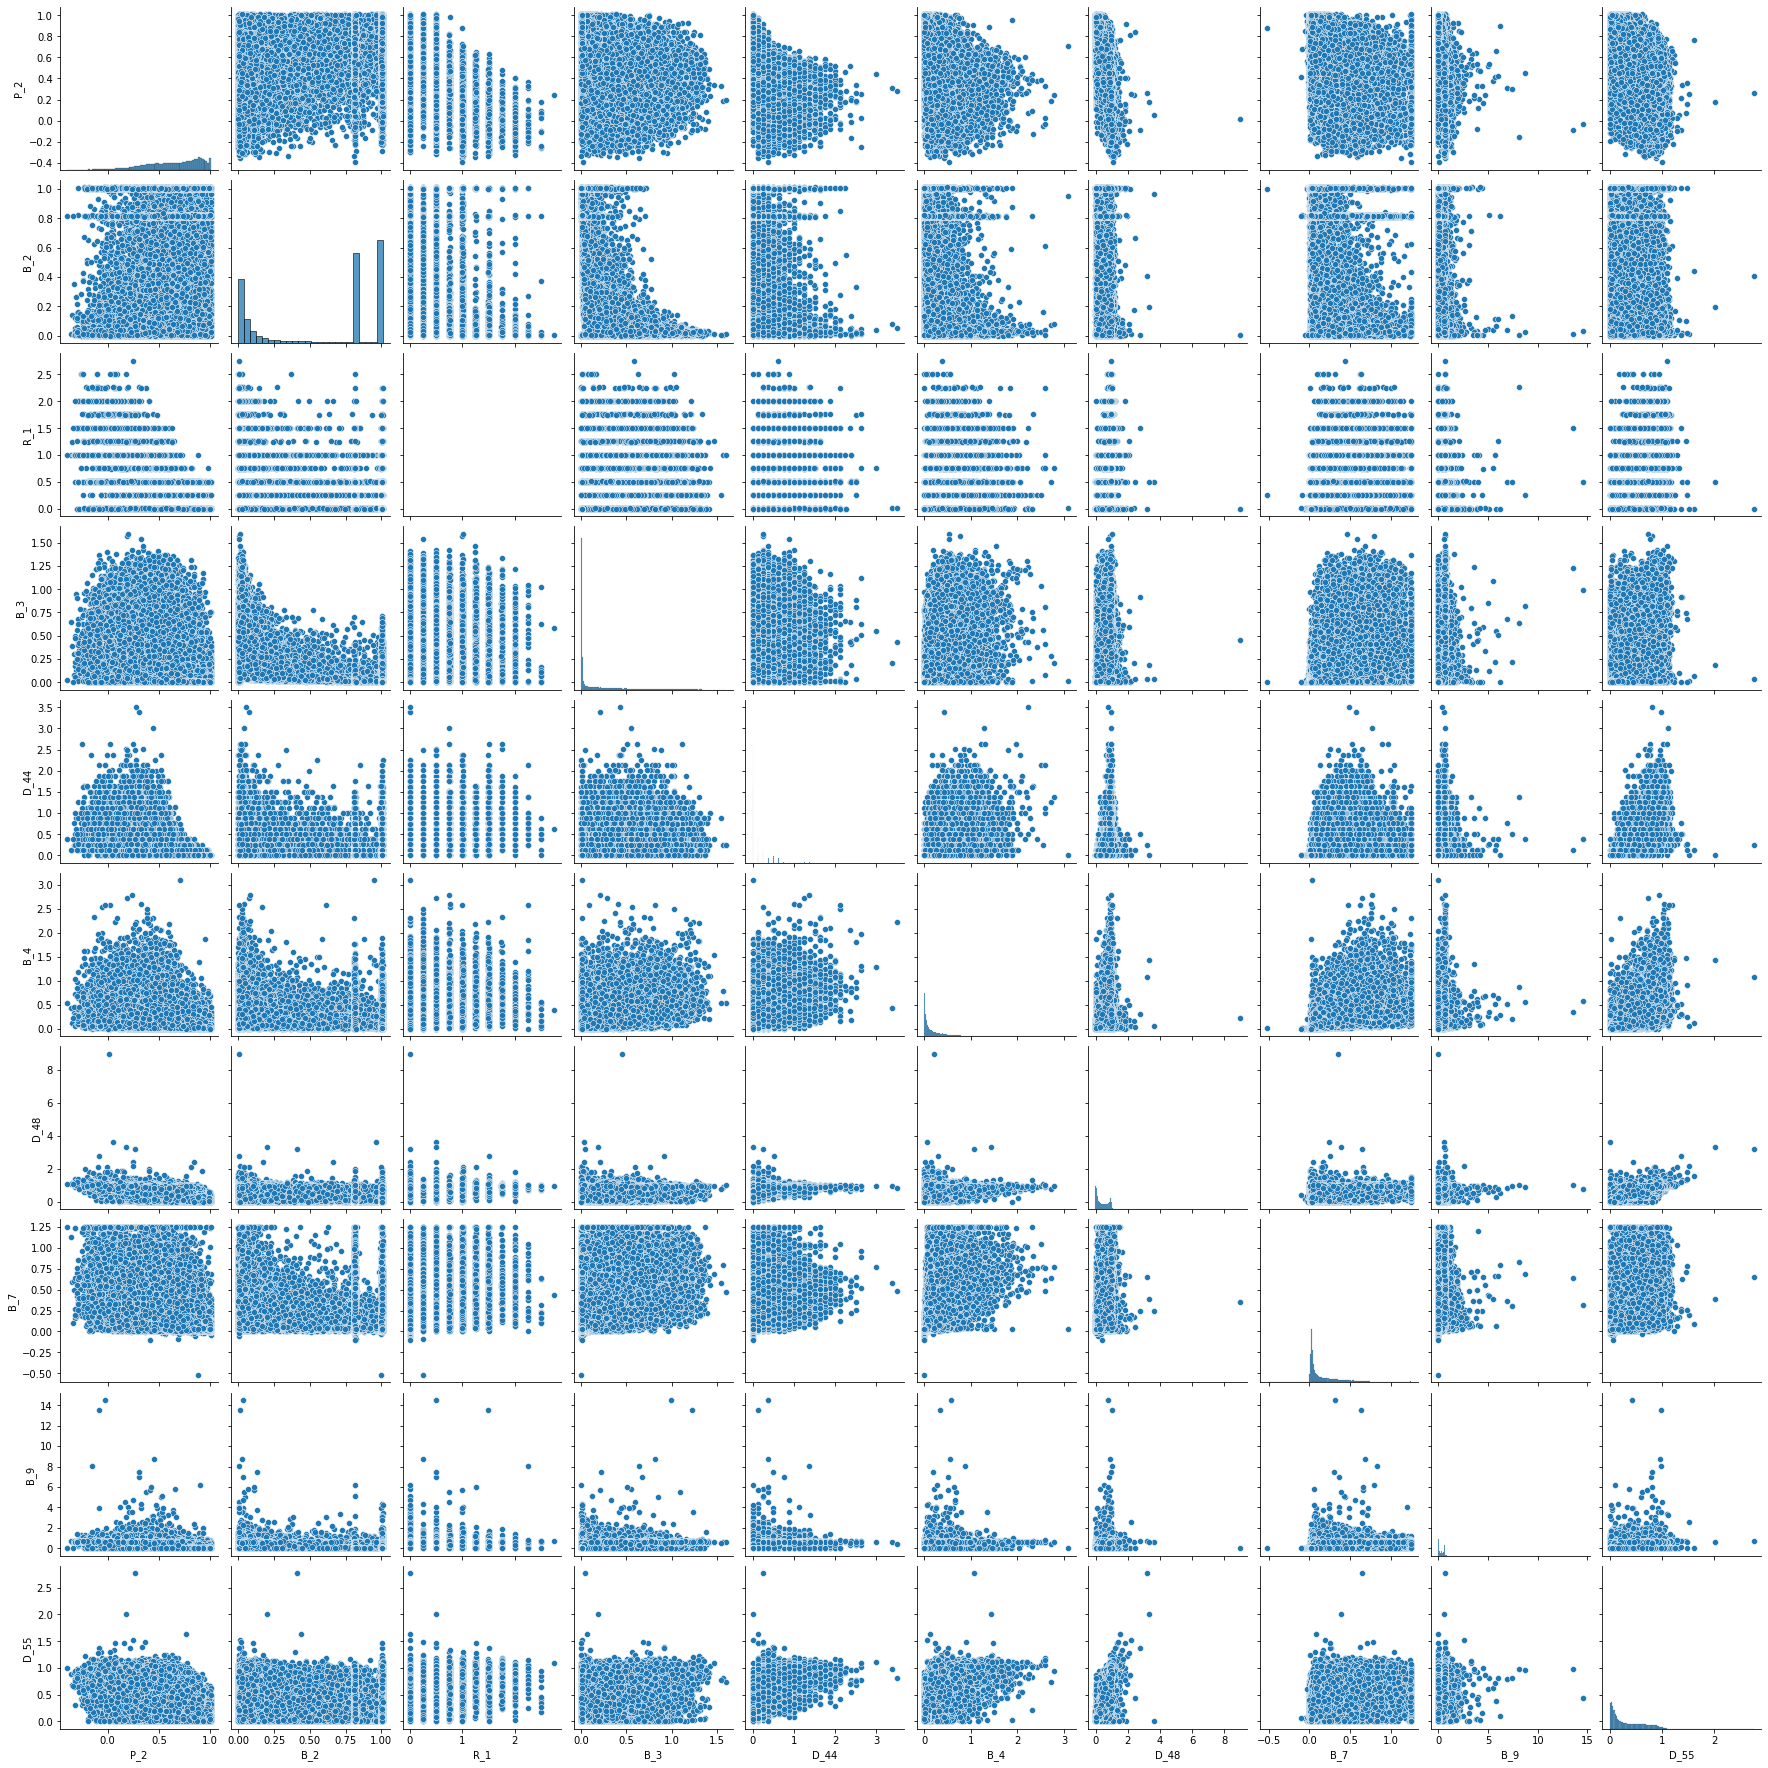

In [15]:
#pair plot for the 10 first columns
sns.pairplot(final_data_selected[final_data_selected.columns.to_list()[:10]], hue=None)

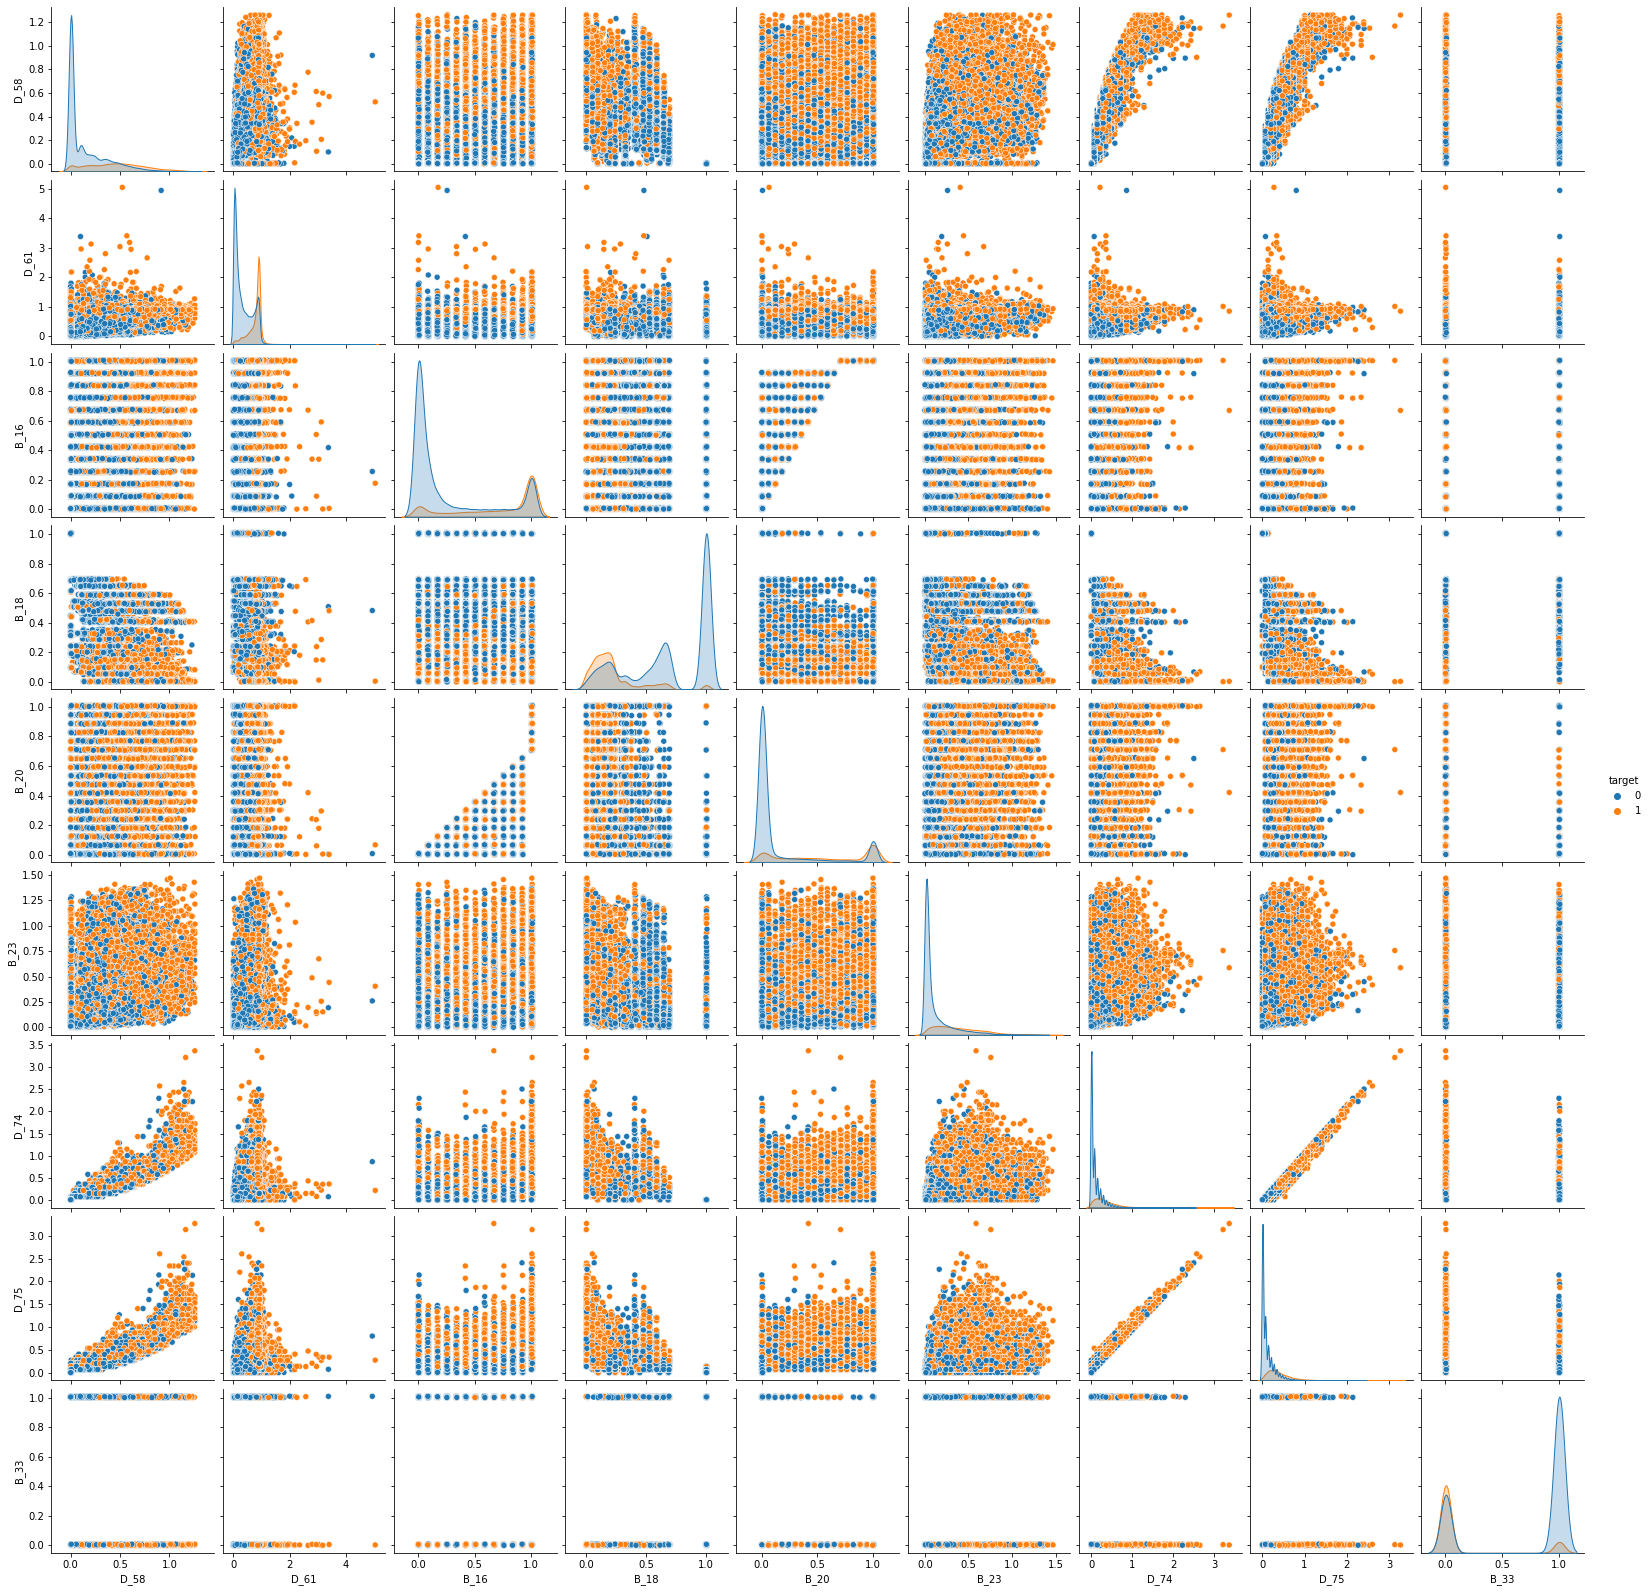

In [16]:
sns.pairplot(final_data_selected[final_data_selected.columns.to_list()[10:]], hue='target')

from distribution plot, we see there are many column that having outliers. Outliers is trouble here.

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

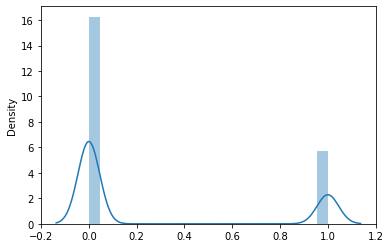

In [17]:
sns.distplot(final_data_selected[['target']])

the target is unbalaced distribution. but not high imbalanced

In [18]:
#separate predictor and target
train=final_data_selected[[col for col in used_columns if col != 'target']]
label=final_data_selected['target']

#dimension of train and target
print(train.shape)
print(label.shape)

(82974, 19)
(82974,)


In [19]:
def imputer(data, imputing_strategy):
    imp=SimpleImputer(missing_values=np.nan, strategy=imputing_strategy)
    data_imputed=imp.fit_transform(data)
    data_df=pd.DataFrame(data_imputed, columns=data.columns, index=data.index.to_list())
    return data_df
train=imputer(train,'mean')
train.isna().sum()

P_2     0
B_2     0
R_1     0
B_3     0
D_44    0
B_4     0
D_48    0
B_7     0
B_9     0
D_55    0
D_58    0
D_61    0
B_16    0
B_18    0
B_20    0
B_23    0
D_74    0
D_75    0
B_33    0
dtype: int64

In [20]:
train.head()

P_2       B_2  \
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...  0.934745  1.007647   
00000fd6641609c6ece5454664794f0340ad84dddce9a26...  0.880519  1.004028   
00001b22f846c82c51f6e3958ccd81970162bae8b007e80...  0.880875  0.812650   
000041bdba6ecadd89a52d11886e8eaaec9325906c97233...  0.621776  1.006183   
00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8ad...  0.871900  0.815746   

                                                         R_1       B_3  \
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...  0.006104  0.007174   
00000fd6641609c6ece5454664794f0340ad84dddce9a26...  0.006911  0.005068   
00001b22f846c82c51f6e3958ccd81970162bae8b007e80...  0.006450  0.007196   
000041bdba6ecadd89a52d11886e8eaaec9325906c97233...  0.007829  0.009937   
00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8ad...  0.001247  0.005528   

                                                        D_44       B_4  \
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...  0.003258  0.070793   
00000fd6641609c6ece5454664794f0340ad84dddce9a26...  0.008781  0.020626   
00001b22f846c82c51f6e3958ccd81970162bae8b007e80...  0.000628  0.031044   
000041bdba6ecadd89a52d11886e8eaaec9325906c97233...  0.007792  0.007235   
00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8ad...  0.002436  0.269407   

                                                        D_48       B_7  \
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...  0.192376  0.058425   
00000fd6641609c6ece5454664794f0340ad84dddce9a26...  0.014696  0.028411   
00001b22f846c82c51f6e3958ccd81970162bae8b007e80...  0.080370  0.026981   
000041bdba6ecadd89a52d11886e8eaaec9325906c97233...  0.410578  0.011969   
00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8ad...  0.325121  0.159818   

                                                         B_9      D_55  \
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...  0.009535  0.187285   
00000fd6641609c6ece5454664794f0340ad84dddce9a26...  0.012926  0.036112   
00001b22f846c82c51f6e3958ccd81970162bae8b007e80...  0.009392  0.098963   
000041bdba6ecadd89a52d11886e8eaaec9325906c97233...  0.020526  0.021400   
00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8ad...  0.004027  0.254067   

                                                        D_58      D_61  \
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...  0.007174  0.227637   
00000fd6641609c6ece5454664794f0340ad84dddce9a26...  0.009756  0.048978   
00001b22f846c82c51f6e3958ccd81970162bae8b007e80...  0.002847  0.137834   
000041bdba6ecadd89a52d11886e8eaaec9325906c97233...  0.009294  0.026844   
00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8ad...  0.382744  0.600739   

                                                        B_16      B_18  \
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...  0.006408  1.007897   
00000fd6641609c6ece5454664794f0340ad84dddce9a26...  0.002940  1.003602   
00001b22f846c82c51f6e3958ccd81970162bae8b007e80...  0.007836  1.004080   
000041bdba6ecadd89a52d11886e8eaaec9325906c97233...  0.089177  1.007289   
00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8ad...  0.005095  0.531486   

                                                        B_20      B_23  \
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...  0.007630  0.040367   
00000fd6641609c6ece5454664794f0340ad84dddce9a26...  0.004319  0.014705   
00001b22f846c82c51f6e3958ccd81970162bae8b007e80...  0.002835  0.020228   
000041bdba6ecadd89a52d11886e8eaaec9325906c97233...  0.008557  0.005060   
00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8ad...  0.008807  0.145214   

                                                        D_74      D_75  \
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...  0.001298  0.001352   
00000fd6641609c6ece5454664794f0340ad84dddce9a26...  0.007925  0.009600   
00001b22f846c82c51f6e3958ccd81970162bae8b007e80...  0.002067  0.003329   
000041bdba6ecadd89a52d11886e8eaaec9325906c97233...  0.004011  0.005505   
00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8ad...  0.144073  0.142552   

                                                    

In [21]:
#split train and test data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(train, label, test_size=0.2)

print(f'x_train size {x_train.shape}')
print(f'x_test size {x_test.shape}')
print(f'y_train size {y_train.shape}')
print(f'y_test size {y_test.shape}')

x_train size (66379, 19)
x_test size (16595, 19)
y_train size (66379,)
y_test size (16595,)


## XGBoost classifier

In [22]:
#modeling
from xgboost import XGBClassifier
xgb_cl=XGBClassifier(objective='binary:logistic',)

# Fit the classifier
eval_set=[(x_test,y_test)]
xgb_cl.fit(x_train, y_train, eval_set=eval_set, verbose=True)

[0]	validation_0-logloss:0.52827
[1]	validation_0-logloss:0.43793
[2]	validation_0-logloss:0.38229
[3]	validation_0-logloss:0.34611
[4]	validation_0-logloss:0.32134
[5]	validation_0-logloss:0.30496
[6]	validation_0-logloss:0.29322
[7]	validation_0-logloss:0.28517
[8]	validation_0-logloss:0.27989
[9]	validation_0-logloss:0.27545
[10]	validation_0-logloss:0.27266
[11]	validation_0-logloss:0.27058
[12]	validation_0-logloss:0.26919
[13]	validation_0-logloss:0.26789
[14]	validation_0-logloss:0.26723
[15]	validation_0-logloss:0.26703
[16]	validation_0-logloss:0.26641
[17]	validation_0-logloss:0.26617
[18]	validation_0-logloss:0.26605
[19]	validation_0-logloss:0.26556
[20]	validation_0-logloss:0.26519
[21]	validation_0-logloss:0.26512
[22]	validation_0-logloss:0.26480
[23]	validation_0-logloss:0.26467
[24]	validation_0-logloss:0.26456
[25]	validation_0-logloss:0.26442
[26]	validation_0-logloss:0.26434
[27]	validation_0-logloss:0.26429
[28]	validation_0-logloss:0.26436
[29]	validation_0-loglos

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [23]:
#model score and evaluation
y_pred_xgb_cl=xgb_cl.predict_proba(x_test)
Y_pred_xgb_cl=[max(i) for i in y_pred_xgb_cl]
print(f'xgboost score: {xgb_cl.score(x_test,y_test)}')

#print(f'amex score: {amex_metric(y_test,Y_pred_xgb_cl)}')

xgboost score: 0.8801446218740584


<AxesSubplot:ylabel='Count'>

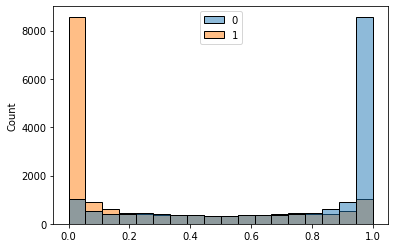

In [24]:
sns.histplot(y_pred_xgb_cl)

## Logistic Regression

In [25]:
#logistic regression model
log_reg=LogisticRegression()
log_reg.fit(x_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [26]:
#score for evaluation
y_pred_log_reg=log_reg.predict_proba(x_test)
print(f'logistic regression score: {log_reg.score(x_test,y_test)}')
Y_pred_log_reg=[max(i) for i in y_pred_log_reg]
#print(f'amex score: {amex_metric(y_test,Y_pred_log_reg)}')
print(f'f1 score: {f1_score(y_test,log_reg.predict(x_test))}')

logistic regression score: 0.8797228080747213
f1 score: 0.7665497076023392


<AxesSubplot:ylabel='Count'>

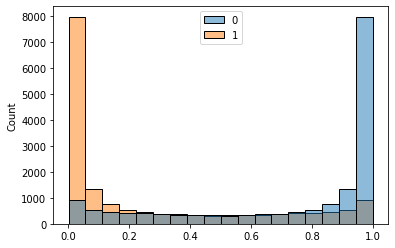

In [27]:
sns.histplot(y_pred_log_reg)

## Random Forest Regressor

In [28]:
RF_reg=RandomForestRegressor()
RF_reg.fit(x_train,y_train)

RandomForestRegressor()

In [29]:
#score for evaluation
y_pred_RF_reg=RF_reg.predict(x_test)
print(f'random forest regression score: {RF_reg.score(x_test,y_test)}')
#print(f'amex score: {amex_metric(y_test,y_pred_RF_reg)}')
print(f'f1 score: {f1_score(y_test,y_pred_RF_reg>0.5)}')

random forest regression score: 0.5613118975271489
f1 score: 0.7719903414970678


<AxesSubplot:ylabel='Count'>

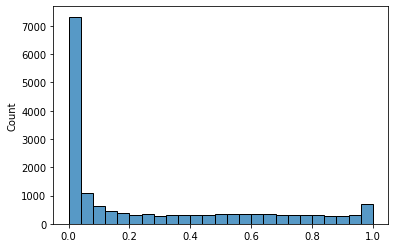

In [30]:
sns.histplot(y_pred_RF_reg)

## random forest classifier

In [31]:
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)

RandomForestClassifier()

In [32]:
#score for evaluation
y_pred_RFC=RFC.predict(x_test)
print(f'random forest classifier score: {RFC.score(x_test,y_test)}')
#print(f'amex score: {amex_metric(y_test,y_pred_RFC)}')
print(f'f1 score: {f1_score(y_test,y_pred_RFC>0.5)}')

random forest classifier score: 0.8820729135281712
f1 score: 0.7749798781188916


from all model, random forest tree has biggest R square score and f1 score. so we choose random forest tree for tuning

## Tuning

In [33]:
random_grid={'n_estimators': [ 100,  307,  514,  721],
             'max_depth': [1, 5, 10, 20, 50],
             'min_samples_split': [1, 2, 5, 10],
             'min_samples_leaf': [1, 2, 3, 4],
             'bootstrap': [True, False],
             'criterion': ['gini', 'entropy']}

In [34]:
model = RandomForestClassifier()
model_random = RandomizedSearchCV(estimator = model,
                               param_distributions = random_grid,
                               n_iter = 5, cv = 5,
                               verbose=2,
                               random_state=42, n_jobs = 4)
model_random.fit(x_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5, n_jobs=4,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 5, 10, 20, 50],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [1, 2, 5, 10],
                                        'n_estimators': [100, 307, 514, 721]},
                   random_state=42, verbose=2)

In [35]:
model_random.best_params_

{'n_estimators': 100,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_depth': 20,
 'criterion': 'gini',
 'bootstrap': False}

In [36]:
print (model_random.score(x_test, y_test))
print(f1_score(y_test, model_random.predict(x_test)>0.5))

0.8812292859294968
0.7750770284149264


the tuningnot give any better score